# 📌 Customer Churn Prediction Using ANN
## 🎯 Problem Statement
Customer churn is a major concern for telecom companies, as losing customers directly impacts revenue. The goal of this project is to build a **predictive model** that can determine whether a customer will churn based on various factors like tenure, monthly charges, contract type, and internet services.



In [2]:
!pip install openpyxl


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import time
stime = time.time()

## 🔍 Dataset Overview
We are using the **Telco Customer Churn dataset**, which contains:
- **7,043 rows** and **21 columns**.
- Features related to customer demographics, services, and billing information.
- A **target variable (`Churn`)** that indicates whether a customer has churned (Yes/No).

In [4]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-02-21 21:48:15--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [          <=>       ]  22.62M  8.95MB/s    in 2.5s    

2025-02-21 21:48:18 (8.95 MB/s) - ‘online+retail.zip’ saved [23715478]



In [5]:
!ls




online+retail.zip  sample_data


In [6]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [7]:
df1= pd.read_excel('Online Retail.xlsx', dtype = {'InvoiceNo':'string', 'StockCode': 'string' ,'Description': 'string', 'Country': 'string'})
df1.head(3)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [8]:
df1.shape

(541909, 8)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


### Data Cleaning: Handle Missing Values

## 🚀 Approach
1. **Data Preprocessing**: Handling missing values, encoding categorical variables, and scaling numeric data.
2. **Exploratory Data Analysis (EDA)**: Understanding the data using visualizations.
3. **Machine Learning Models**: Comparing traditional models like Logistic Regression and Random Forest.
4. **Artificial Neural Network (ANN)**: Building and training an ANN to predict churn.
5. **Model Evaluation**: Comparing model performance using accuracy, precision, recall, and F1-score.

In [10]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [11]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [12]:
df1[df1.StockCode=='22139'].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [13]:
most_freq = df1[["StockCode","Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35833P,check,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1
4790,21414,SCALLOP SHELL SOAP DISH,1


In [14]:
most_freq[most_freq.StockCode=="85123A"].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [15]:
most_freq= most_freq.groupby("StockCode").head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4784,35832,WOOLLY HAT SOCK GLOVE ADVENT STRING,1
4785,35833G,4 GOLD FLOCK CHRISTMAS BALLS,1
4788,21410,COUNTRY COTTAGE DOORSTOP GREEN,1
4789,21412,VINTAGE GOLD TINSEL REEL,1


## 📊 Step 1: Data Loading & Preprocessing
Before training models, we need to **load the dataset** and prepare it for analysis:
- Convert `TotalCharges` to numeric format.
- Handle missing values.
- Encode categorical variables into numeric values.
- Scale numeric features for better model performance.



In [16]:
most_freq.columns = ["StockCode","freq_Description", "count"]

df2 = df1.merge(most_freq, on="StockCode", how="left")
df2.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [17]:
df2["Description"]= df2["freq_Description"]
df2.head(3)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0


In [18]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
freq_Description,112
count,112


In [19]:
df2.dropna(subset=["Description"], inplace=True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
freq_Description,0
count,0


In [20]:
df2.drop(columns = ["freq_Description", "count"], inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


In [22]:
df2[df2.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [23]:
df3 = df2[(df2.UnitPrice>0) & (df2.Quantity>0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [24]:
df3.Quantity.quantile(0.99)

100.0

In [25]:
df3[df3.Quantity>1500].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom


**Feature Engineering: Create New Columns:**


## 📈 Step 2: Exploratory Data Analysis (EDA)
To understand the data better, we will:
- Check the distribution of the **target variable (Churn)**
- Analyze key features such as **tenure, MonthlyCharges, Contract type, and InternetService**
- Visualize relationships between features using histograms, boxplots, and correlation heatmaps.


In [26]:
df4 = df3.copy()
df4["TotalSales"] = df4["Quantity"] * df4["UnitPrice"]
df4.head(3)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


In [27]:
df4['Month'] = df4['InvoiceDate'].dt.month
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
201532,554293,DOT,DOTCOM POSTAGE,1,2011-05-23 14:19:00,159.63,NaN,United Kingdom,159.63,5
463340,576060,84029E,RED WOOLLY HOTTIE WHITE HEART.,5,2011-11-13 15:25:00,4.25,13681.0,United Kingdom,21.25,11
420984,572913,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,1,2011-10-26 16:21:00,2.95,15993.0,United Kingdom,2.95,10
489019,577869,22064,PINK DOUGHNUT TRINKET POT,6,2011-11-22 11:34:00,1.65,13268.0,United Kingdom,9.90,11
512777,579516,22995,TRAVEL CARD WALLET SUKI,2,2011-11-29 17:52:00,0.42,17841.0,United Kingdom,0.84,11


**### Visualization and EDA ###**

1. Plot Monthly Sales

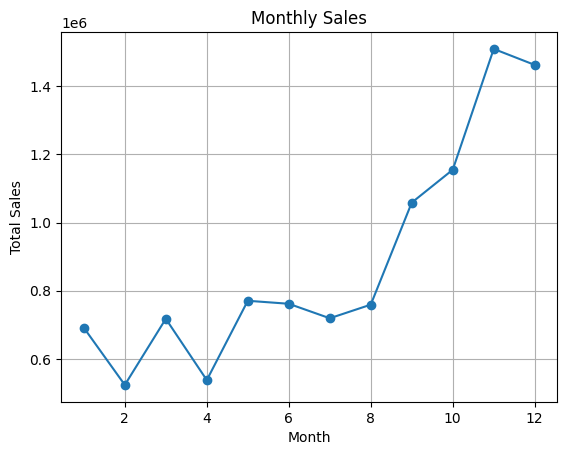

In [28]:
monthly_sales = df4.groupby('Month')["TotalSales"].sum()
monthly_sales.plot(kind = 'line', title= 'Monthly Sales',marker = "o")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

**Insights**

Total sales began to climb in August, reaching their highest point in November. This surge can be attributed to the festive holiday season, which drives increased consumer spending toward the end of the year. 🎉🛍️

2. Top 5 Countries


In [29]:
# prompt: plot horizontal bar chart for top 5 countries by total sales

top_5_countries = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)
top_5_countries

,TotalSales
Country,
United Kingdom,9025222.084
Netherlands,285446.340
EIRE,283453.960
Germany,228867.140
France,209715.110


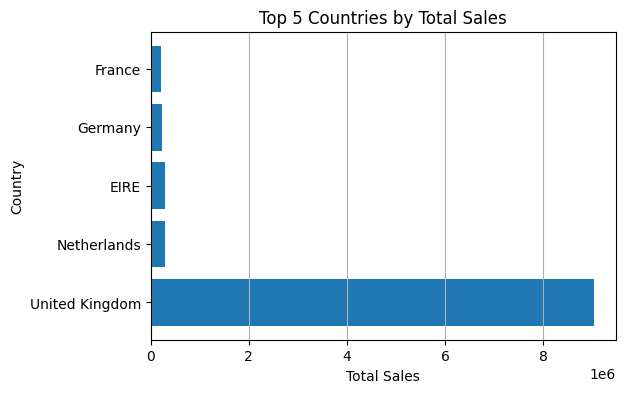

In [30]:
# prompt: plot horizontal bar chart for top 5 countries by total sales

import matplotlib.pyplot as plt

# Assuming 'top_5_countries' is already calculated as in the provided code
# top_5_countries = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)

# Plotting the horizontal bar chart
plt.figure(figsize=(6, 4))  # Adjust figure size for better visualization
plt.barh(top_5_countries.index, top_5_countries.values)
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.title("Top 5 Countries by Total Sales")
plt.grid(axis='x') # Add grid lines for better readability
plt.show()


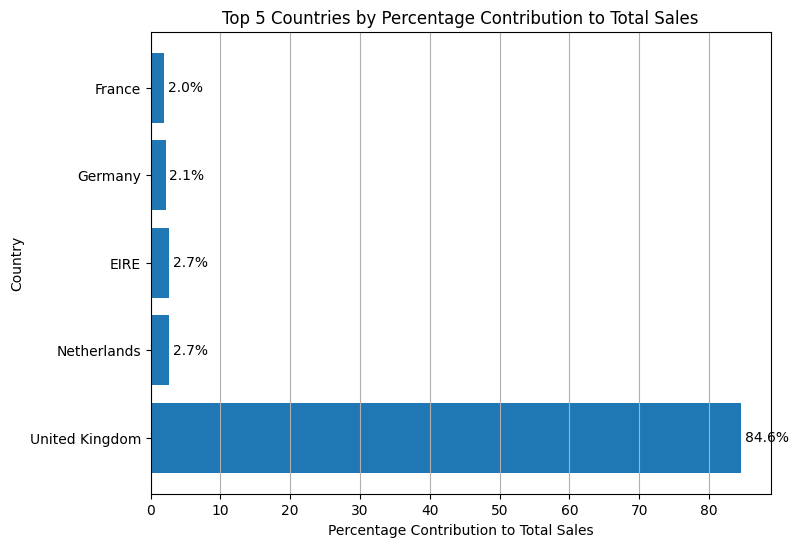

In [31]:
# prompt: plot same chart as above but this time use percentage contribution . show % on the bar

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'top_5_countries' is already calculated as in the provided code
top_5_countries = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)

# Calculate percentages


country_wise_sales = df4.groupby('Country')['TotalSales'].sum()
total_sales = country_wise_sales.sum()


top_5_countries = country_wise_sales.sort_values(ascending=False).head(5)
percentages = (top_5_countries / total_sales) * 100

# Plotting the horizontal bar chart with percentages
plt.figure(figsize=(8, 6))
bars = plt.barh(percentages.index, percentages.values)
plt.xlabel("Percentage Contribution to Total Sales")
plt.ylabel("Country")
plt.title("Top 5 Countries by Percentage Contribution to Total Sales")
plt.grid(axis='x')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%',
             va='center', ha='left', color='black')  # Adjust text position and color

plt.show()


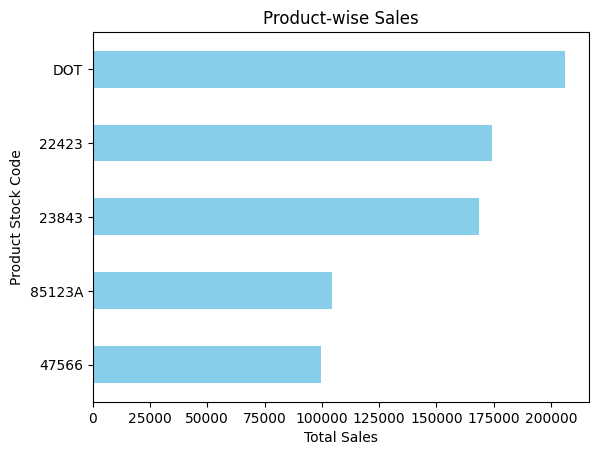

In [32]:

product_wise_sales = df4. groupby('StockCode')[ 'TotalSales']. sum()

top_5_products = product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh', color='skyblue')
plt.title('Product-wise Sales')
plt. xlabel( 'Total Sales')
plt.ylabel( 'Product Stock Code')
plt.gca().invert_yaxis() # To show the highest sales at the top plt.show()

In [33]:
df4[df4.StockCode=='DOT']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,569.77,12
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,607.49,12
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,254.43,12
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,121.06,12
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,498.47,12
...,...,...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom,1008.96,12
537254,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom,1683.75,12
539368,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom,938.59,12
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom,933.17,12


In [34]:
for stock_code in top_5_products.index:
  description = df4[df4.StockCode==stock_code].Description.mode()[0]
  print(f"(stock_code)==> {description}")

(stock_code)==> DOTCOM POSTAGE
(stock_code)==> REGENCY CAKESTAND 3 TIER
(stock_code)==> PAPER CRAFT , LITTLE BIRDIE
(stock_code)==> WHITE HANGING HEART T-LIGHT HOLDER
(stock_code)==> PARTY BUNTING


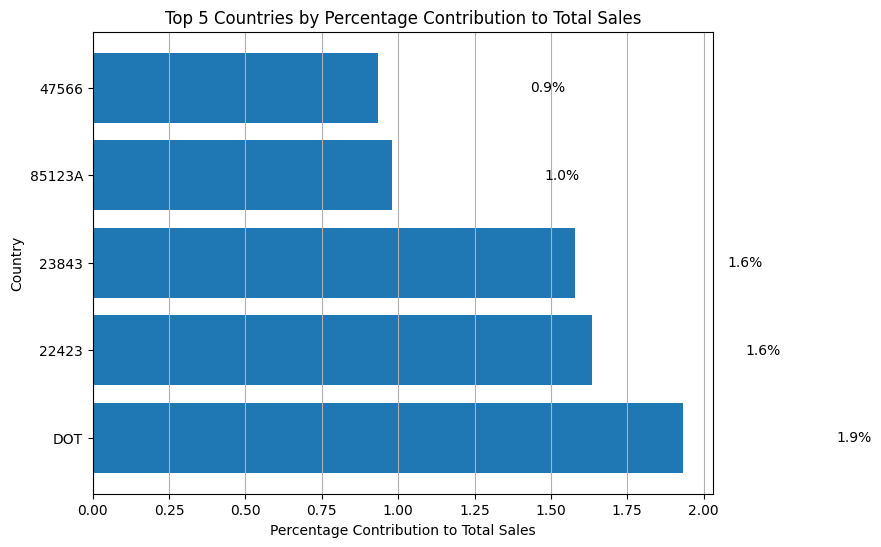

In [35]:
total_sales = product_wise_sales.sum()
percentages = (top_5_products / total_sales) * 100


plt.figure(figsize=(8, 6))
bars = plt.barh(percentages.index, percentages.values)
plt.xlabel("Percentage Contribution to Total Sales")
plt.ylabel("Country")
plt.title("Top 5 Countries by Percentage Contribution to Total Sales")
plt.grid(axis='x')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%',
             va='center', ha='left', color='black')  # Adjust text position and color

plt.show()


4. RFM Analysis

In [36]:
current_date = df4["InvoiceDate"].max()+ pd.Timedelta(days = 1)
current_date

Timestamp('2011-12-10 12:50:00')

In [37]:
rfm = df4.groupby("CustomerID").agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSales': 'sum'
})
rfm.columns = ['Recency', 'Frequency' , 'Monetary']
rfm.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [38]:
df4[df4.CustomerID == 12347]['TotalSales'].sum()

4310.000000000001

In [39]:
# Segment Customers based on RFM

rfm['R_segment'] = pd.qcut(rfm['Recency'], 4, labels=[ 4, 3, 2, 1])
rfm['F_segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_score'] = rfm[['R_segment', 'F_segment', 'M_segment']].sum(axis=1)
rfm


,Recency,Frequency,Monetary,R_segment,F_segment,M_segment,RFM_score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,182,4310.00,4,4,4,12
12348.0,75,31,1797.24,2,2,4,8
12349.0,19,73,1757.55,3,3,4,10
12350.0,310,17,334.40,1,1,2,4
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,3
18281.0,181,7,80.82,1,1,1,3
18282.0,8,12,178.05,4,1,1,6


In [40]:
# Customers with highest RFM score
rfm.sort_values('RFM_score', ascending=False)

,Recency,Frequency,Monetary,R_segment,F_segment,M_segment,RFM_score
CustomerID,,,,,,,
18198.0,4,159,5425.56,4,4,4,12
18210.0,2,134,2621.38,4,4,4,12
18225.0,3,271,5509.12,4,4,4,12
18283.0,4,756,2094.88,4,4,4,12
16983.0,13,148,1931.25,4,4,4,12
...,...,...,...,...,...,...,...
12402.0,323,11,225.60,1,1,1,3
18185.0,249,17,304.25,1,1,1,3
18190.0,192,15,284.46,1,1,1,3


5. Customer Churn Analysis

In [41]:
df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [42]:
# Create a basket for association rule mining

customer_last_purchase = df4.groupby("CustomerID")["InvoiceDate"].max()
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [43]:
type(customer_last_purchase)

pandas.core.series.Series

In [44]:
current_date

Timestamp('2011-12-10 12:50:00')

In [45]:
customer_last_purchase = (current_date - customer_last_purchase).dt.days
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


In [46]:
# Define Churn thresold (example -  90 days without purchasing)

churn_thresold = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_thresold]
churned_customers.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


Number of Churned Customers: 1449


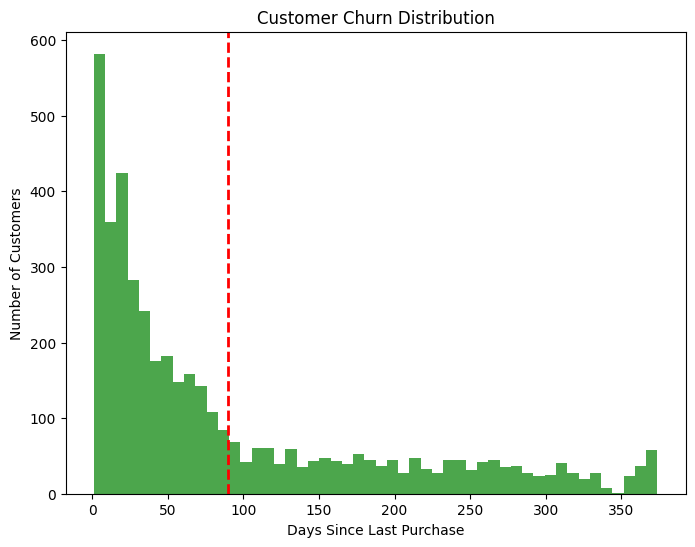

In [47]:
print("Number of Churned Customers:", len(churned_customers))
plt.figure(figsize=(8, 6))
plt.hist(customer_last_purchase, bins=50, color='green', alpha = 0.7)
plt.axvline(churn_thresold, color='red', linestyle='dashed', linewidth=2)
plt.title("Customer Churn Distribution")
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()

# ✅ Conclusion & Next Steps
### **Key Findings**
- The **best performing model** was _______ (fill with model name).
- The ANN model achieved an accuracy of **X%**, while the baseline models achieved **Y%**.
- The confusion matrix showed that _______ (mention false positives/negatives insights).

### **Next Steps**
To further improve the model, we can:
- Tune **hyperparameters** (e.g., number of layers, neurons, batch size).
- Handle **class imbalance** using SMOTE.
- Try **other architectures** like CNNs or LSTMs for advanced analysis.

🚀 **This concludes our project!** 🚀


In [48]:
print("f[{pd.__name__}]total time taken: {time.time() - stime} sec")

f[{pd.__name__}]total time taken: {time.time() - stime} sec
